# 第二次作业

某种产品性能评分与其参数因素$A$（$A_1$、$A_2$）、因素$B$（$B_1$、$B_2$）、因素$C$（$C_1$、$C_2$）有关，每个处理组合重复3次试验，

结果见附表，试分析各因素以及他们的交互作用对产品性能评分有无显著影响，并选出最优组合条件。

**附表：**
<table>
    <caption>某产品性能评分试验结果</caption>
    <tr>
        <td colspan = 3, rowspan = 2>处理</td>
        <td colspan = 3>重复</td>
        <td rowspan = 2>和x<sub>ijk</sub></td>
    </tr>
    <tr>
        <td>1</td>
        <td>2</td>
        <td>3</td>
    </tr>
    <tr>
        <td rowspan = 4>A1</td>
        <td rowspan = 2>B1</td>
        <td>C1</td>
        <td>12</td>
        <td>14</td>
        <td>13</td>
        <td>39</td>
    </tr>
        <tr>
        <td>C2</td>
        <td>12</td>
        <td>11</td>
        <td>11</td>
        <td>34</td>
    </tr>
    <tr>
        <td rowspan = 2>B2</td>
        <td>C1</td>
        <td>10</td>
        <td>9</td>
        <td>9</td>
        <td>28</td>
    </tr>
    <tr>
        <td>C2</td>
        <td>9</td>
        <td>9</td>
        <td>8</td>
        <td>26</td>
    </tr>
    <tr>
        <td rowspan = 4>A2</td>
        <td rowspan = 2>B1</td>
        <td>C1</td>
        <td>13</td>
        <td>15</td>
        <td>14</td>
        <td>42</td>
    </tr>
    <tr>
        <td>C2</td>
        <td>14</td>
        <td>12</td>
        <td>12</td>
        <td>38</td>
    </tr>
    <tr>
        <td rowspan = 2>B2</td>
        <td>C1</td>
        <td>11</td>
        <td>10</td>
        <td>10</td>
        <td>31</td>
    </tr>
    <tr>
        <td>C2</td>
        <td>10</td>
        <td>11</td>
        <td>9</td>
        <td>30</td>
    </tr>
</table>

**显著性水平：选取为$\alpha=0.05$**

本文由vscode jupyter插件导出，源文件为ipynb格式。<br>
源文件链接：<br>
[GitHub Mosazh_AEDSA](https://github.com/Mosazh/AEDSA/blob/main/assignment_2/dp.ipynb) <br>
[Gitee Mosah_AEDSA](https://gitee.com/mosah/aedsa/blob/master/assignment_2/dp.ipynb) <br>
[表格数据](https://gitee.com/mosah/aedsa/blob/master/assignment_2/data.xlsx)


## 引入需要的库

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

warnings.filterwarnings("ignore")

plt.rc("font",family='KaiTi')       #指定中文字体，不然会乱码
#%matplotlib inline是Jupyter Notebook的魔术命令，用于在 Notebook 中以行内方式显示 matplotlib 绘图
%config InlineBackend.figure_format = 'retina'      #绘制高清图像
%matplotlib inline


## 数据的导入与整理

In [2]:
# data = pd.read_csv('data.csv')  # 导入数据
data = pd.read_csv('data.csv', header=2)  # 导入数据，并指定标题所在的行号为第2行
# 修改列名称
data = data.rename(columns={'Unnamed: 0': '因素A', 'Unnamed: 1': '因素B', 'Unnamed: 2': '因素C', '1': '重复1', \
                            '2': '重复2', '3': '重复3', 'Unnamed: 6': '和Xijk'})

# 使用 ffill 方法将第一、二列的 NaN 值替换为前一个非 NaN 值
data[['因素A', '因素B']] = data[['因素A', '因素B']].fillna(method='ffill')

# 查看表格
data


,因素A,因素B,因素C,重复1,重复2,重复3,和Xijk
0,A1,B1,C1,12,14,13,39
1,A1,B1,C2,12,11,11,34
2,A1,B2,C1,10,9,9,28
3,A1,B2,C2,9,9,8,26
4,A2,B1,C1,13,15,14,42
5,A2,B1,C2,14,12,12,38
6,A2,B2,C1,11,10,10,31
7,A2,B2,C2,10,11,9,30


In [3]:
# 将重复列转换成行
data_melt = pd.melt(data, id_vars=['因素A', '因素B', '因素C'], value_vars=['重复1', '重复2', '重复3'], \
                    var_name='重复', value_name=r'值')

# 将表转换每个重复次数为单独行
df1 = pd.pivot_table(data_melt, index=['因素A', '因素B', '因素C', '重复'], values=r'值').reset_index()

df1.head(10)
# df1


,因素A,因素B,因素C,重复,值
0,A1,B1,C1,重复1,12
1,A1,B1,C1,重复2,14
2,A1,B1,C1,重复3,13
3,A1,B1,C2,重复1,12
4,A1,B1,C2,重复2,11
5,A1,B1,C2,重复3,11
6,A1,B2,C1,重复1,10
7,A1,B2,C1,重复2,9
8,A1,B2,C1,重复3,9
9,A1,B2,C2,重复1,9


## 数据概览

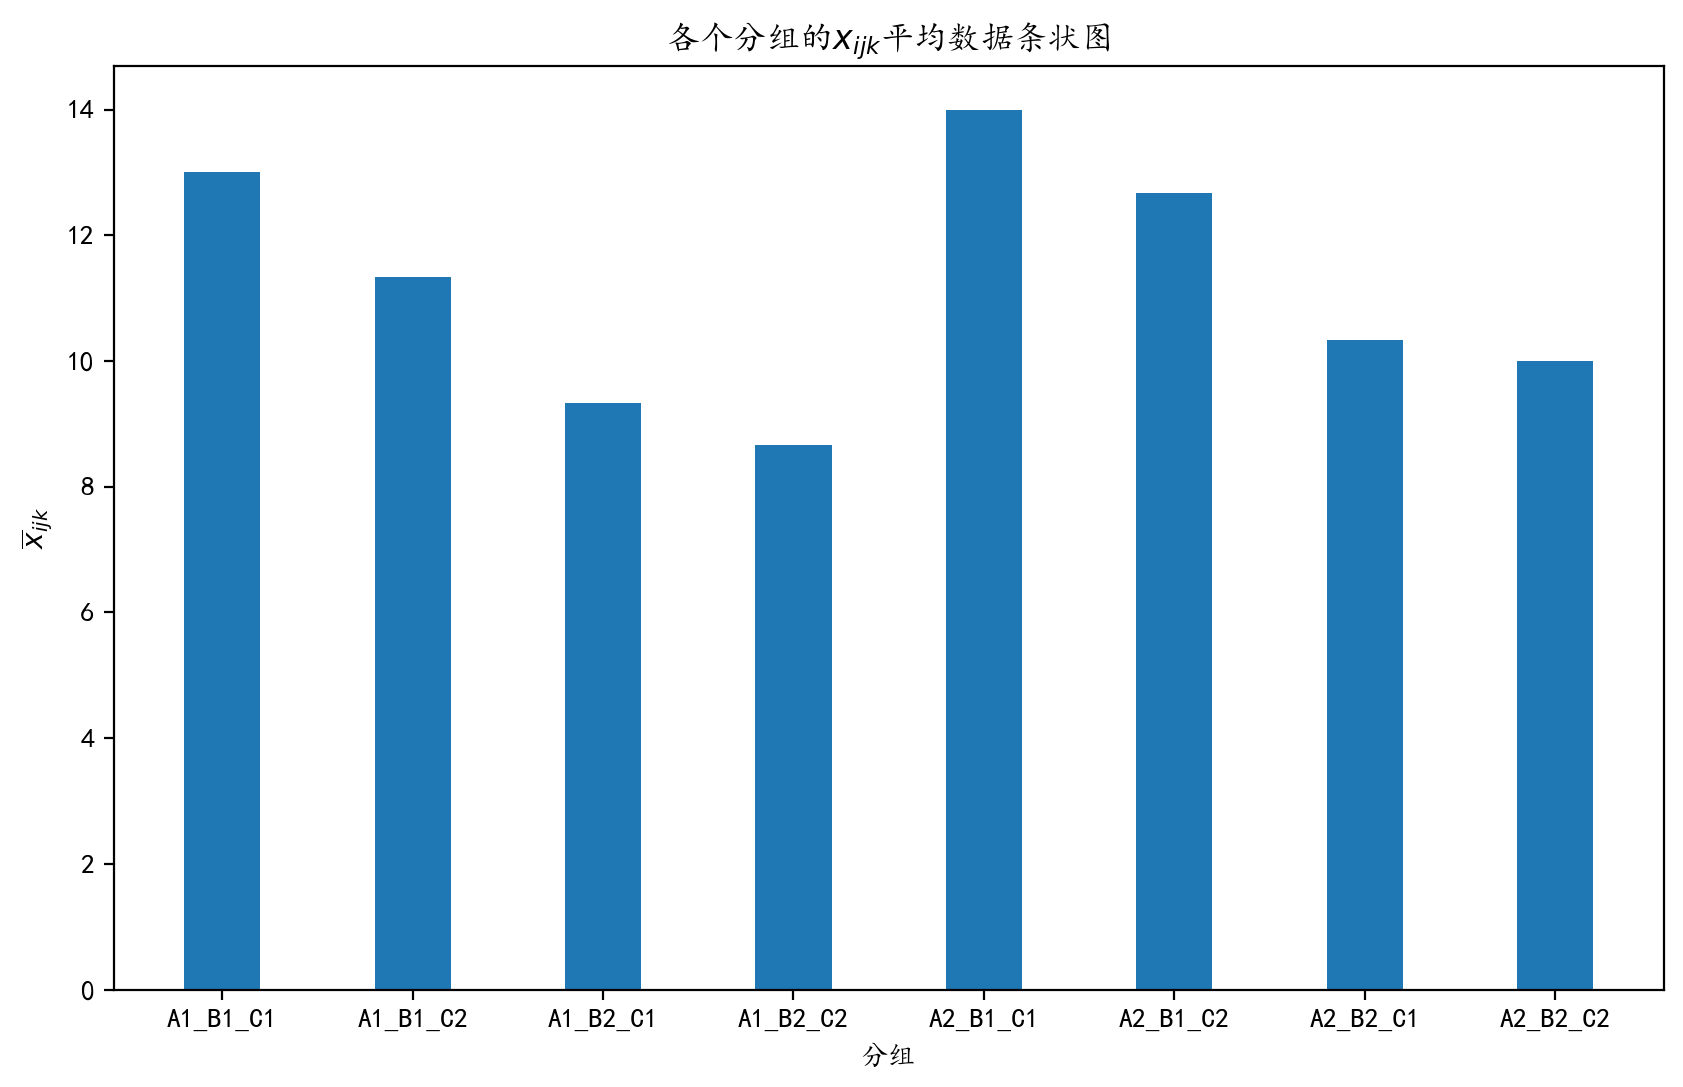

In [4]:
# 计算分组的平均值
grouped = data.groupby(['因素A', '因素B', '因素C']).mean().reset_index()

# 将和Xijk的值除以3得到平均值
grouped['和Xijk'] /= 3
df2 = data.assign(平均值=data['和Xijk'] / 3)
# df2

# 绘制条状图
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(grouped.index))
bar_width = 0.4

rects1 = ax.bar(x, grouped['和Xijk'], bar_width)

ax.set_xticks(x)
ax.set_xticklabels([f"{a}_{b}_{c}" for a, b, c in zip(grouped['因素A'], grouped['因素B'], grouped['因素C'])])

plt.xlabel('分组')
plt.ylabel(r'$\overline{x}_{ijk}$')
plt.title('各个分组的${x}_{ijk}$平均数据条状图')

plt.show()


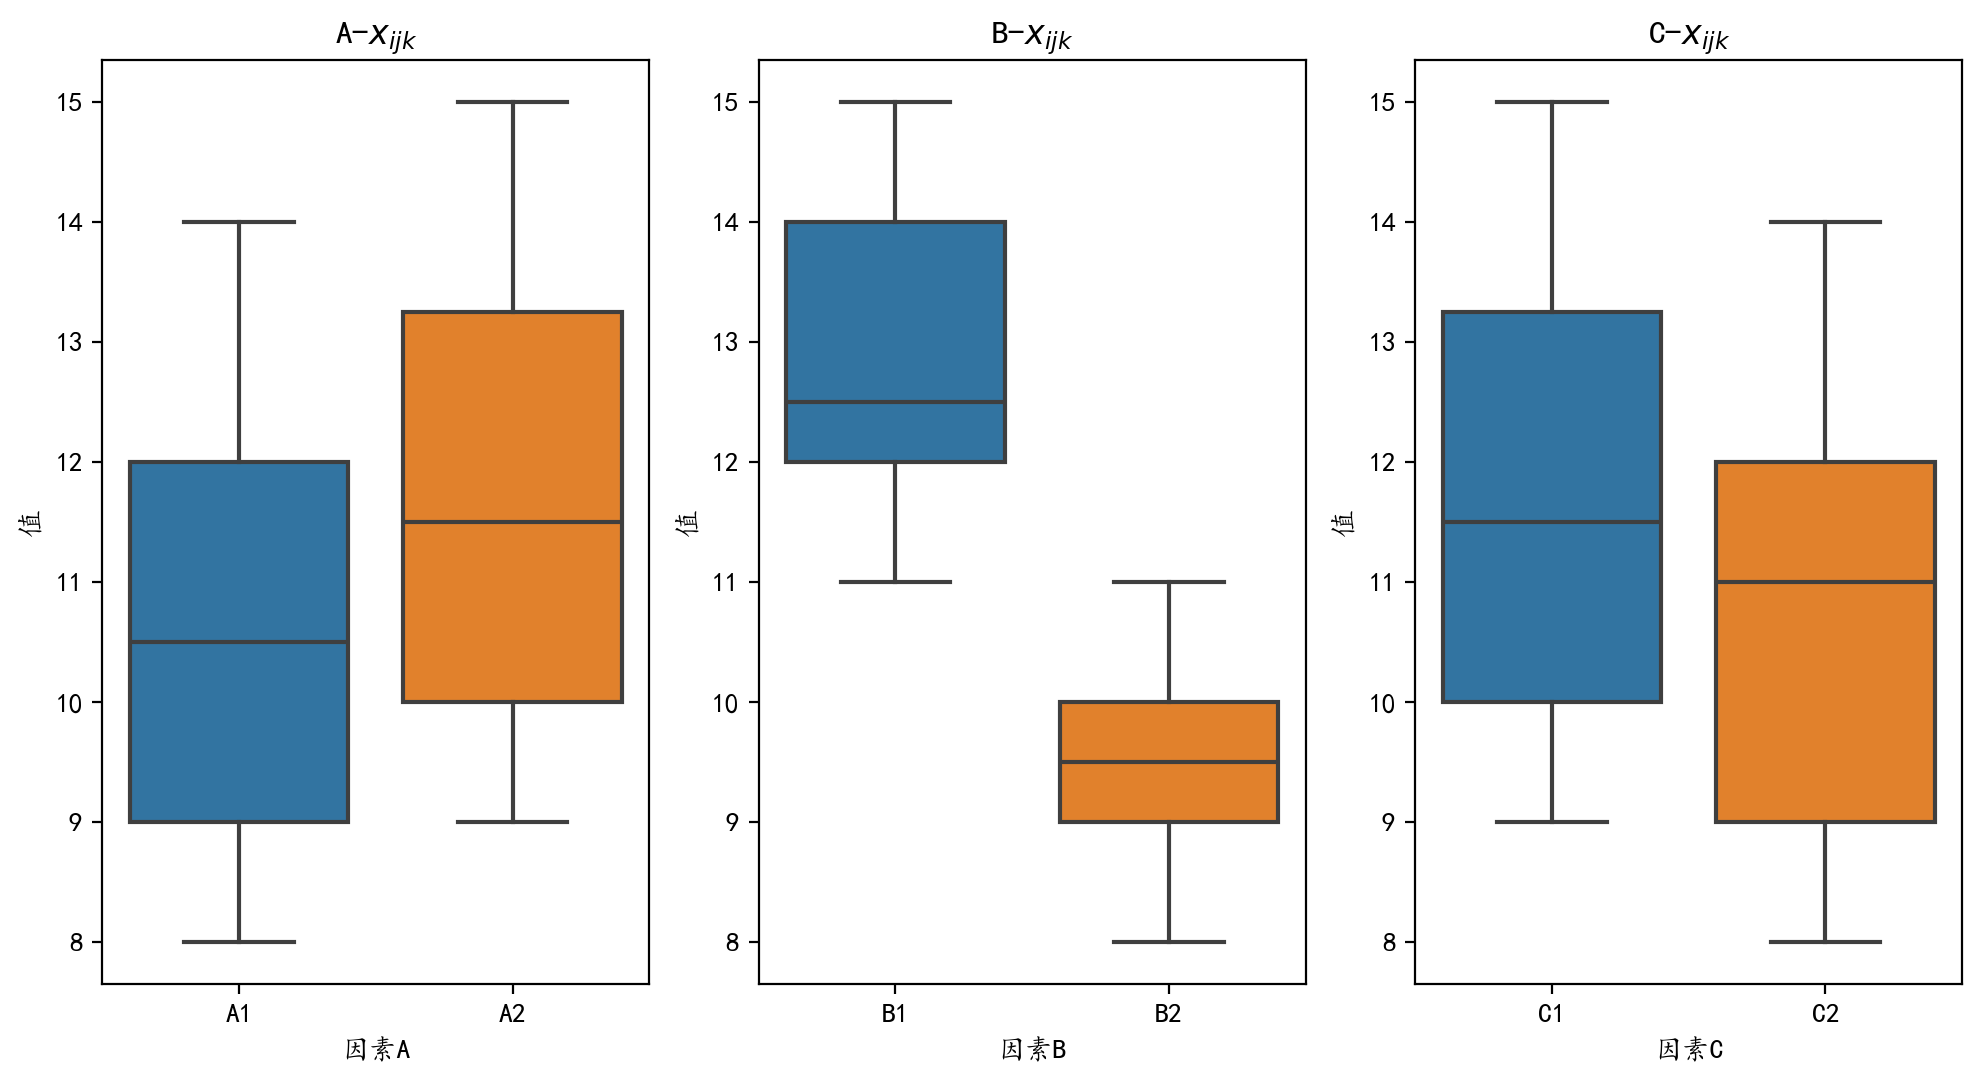

In [5]:
# 绘制箱型图
fig, ax = plt.subplots(1,3,figsize=(12,6))

ax1 = sns.boxplot(x='因素A',y='值',data=df1, ax=ax[0])
ax1.set_title(r'A-${x}_{ijk}$')

ax2=sns.boxplot(x='因素B',y='值',data=df1, ax=ax[1])
ax2.set_title(r'B-${x}_{ijk}$')

ax3=sns.boxplot(x='因素C',y='值',data=df1, ax=ax[2])
ax3.set_title(r'C-${x}_{ijk}$')

plt.show()


可以从上述的箱型图中看出，数据中并没有异常值。

## 因素分析

### 单$x_ijk$

In [6]:
# 定义线性回归模型，以“值”为因变量，以“因素A”、“因素B”、“因素C”及它们之间的交互项为自变量
model_all = ols('值 ~  因素A + 因素B + 因素C + 因素A : 因素B + \
                因素A : 因素C + 因素B : 因素C + 因素A : 因素B : 因素C', \
                data=df1).fit()

# 对于线性回归模型进行方差分析，计算各种来源的平方和、均方和、F值和p值
anova_table_all = anova_lm(model_all, type=2)

# 打印输出方差分析表
anova_table_all


,df,sum_sq,mean_sq,F,PR(>F)
因素A,1.0,8.166667e+00,8.166667e+00,1.152941e+01,3.695096e-03
因素B,1.0,6.016667e+01,6.016667e+01,8.494118e+01,8.443886e-08
因素C,1.0,6.000000e+00,6.000000e+00,8.470588e+00,1.021741e-02
因素A:因素B,1.0,8.655900e-30,8.655900e-30,1.222009e-29,1.000000e+00
因素A:因素C,1.0,1.666667e-01,1.666667e-01,2.352941e-01,6.342003e-01
因素B:因素C,1.0,1.500000e+00,1.500000e+00,2.117647e+00,1.649493e-01
因素A:因素B:因素C,1.0,1.687423e-29,1.687423e-29,2.382244e-29,1.000000e+00
Residual,16.0,1.133333e+01,7.083333e-01,NaN,NaN


上述程序进行了双、三因素的方差分析，因变量为"$值$"，自变量为"$因素A$"、"$因素B$"、"$因素C$"及其交互项。

输出结果表格包含各自变量和交互项的 $F$ 值， $p$ 值，自由度以及均方（mean square）等信息。对于主效应，可以看到 $因素B$ 的 $p$ 值最小，即为高度显著，说明 $因素B$ 对因变量的影响最大；$因素A$ 和 $因素C$ 的 $p$ 值也小于0.05，说明它们的影响是显著的。而对于两个交互项 "$因素A$:$因素C$"和三个交互项的"$因素A$:$因素B$:$因素C$"， $p$ 值皆大于0.05，说明它们对因变量的影响不显著。